In [0]:
!pip install ipydeps

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 2.7MB 13.9MB/s 
  Created wheel for ipydeps: filename=ipydeps-0.10.0-cp36-none-any.whl size=10798 sha256=7240c9f35f1fd19dcf371ef130c02494daf5460c05197cac67d289ec258a4fc5
  Stored in directory: /root/.cache/pip/wheels/e3/4a/6f/2a1810efd60598edd3f3a3d800bb46f734407dd62c18710534
  Created wheel for pypki2: filename=pypki2-0.11.0-cp36-none-any.whl size=10428 sha256=9241d6a0abfb7db09b9da30bac40d11d4e60ff2c9db66b3f373e0a4fd68a19d9
  Stored in directory: /root/.cache/pip/wheels/94/40/0b/348ab8c4a7ccd1f846f0b7a011065f70b06a53c7accf84a301
Successfully built ipydeps pypki2


In [0]:
import ipydeps
ipydeps.pip(["keras-rl", "gym"])

In [0]:
!pip uninstall tensorflow==2.0.0-beta

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [0]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 56kB/s 
     |████████████████████████████████| 368kB 38.0MB/s 
     |████████████████████████████████| 3.2MB 41.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [0]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [0]:
#This juypiter notebook contains an agent that counts cards with a 312 card non infinte deck

In [0]:
import numpy as np
import gym
from gym import spaces
from gym.utils import seeding

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.


In [0]:
import copy
import random
def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
# 6 52 card decks
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
deck2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
# Countn keeps track of the count of the cards / number of decks left
countn = 0.0
# Agents reward
sums = 0
# Agent bet
rewards = 0
# Sum of the players hand
player_hand_sum = 0
# Length of the deck
deckk = 0

# Draw card removes a card from the deck then returns it. It also updates the count with each drawn card.
def draw_card(rand):
    global countn
    curr = deck[rand]
    deck.remove(curr)
    if int(curr) == 1 or int(curr) == 10:
        countn -= 1
    elif int(curr) < 7 and int(curr) != 1:
        countn += 1
    deck_num = len(deck)/52
    deck_num = round(deck_num, 0) +1
    countn = countn/deck_num
    return int(curr)


# Calls draw_card twice
def draw_hand():
    return [draw_card(random.randint(0, len(deck)-1)), draw_card(random.randint(0, len(deck)-1))]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class Count6BlackjackEnv(gym.Env):
    """Simple blackjack environment
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.
    http://incompleteideas.net/book/the-book-2nd.html
    """
    def __init__(self, natural=False):
      # The agent can make a bet between 5 and 500
        self.action_space = spaces.Box(5,500, [1], dtype=np.float32)
      # The agent observes the count of the card and the length of the deck
        self.observation_space = spaces.Tuple((
            spaces.Discrete(40),
            spaces.Discrete(52)))

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()


    def step(self, action):
        global deck
        global countn
        global sums
        global rewards
        global player_hand_sum
        global deckk
        bet = action
        deckk = len(deck)
        # Agent will hit while card total is less than 17
        while sum_hand(self.player) < 17:
            if len(deck) == 0:
                deck = copy.copy(deck2)
                countn = 0
            self.player.append(draw_card(random.randint(0, len(deck)-1)))
            if is_bust(self.player):
                done = True
                reward = bet * -1
            else:
                done = False
                reward = 0
        # Dealer will hit while card total is less than 17
        else:  
            done = True
            while sum_hand(self.dealer) < 17:
                if len(deck) == 0:
                    deck = copy.copy(deck2)
                    countn = 0
                self.dealer.append(draw_card(random.randint(0, len(deck)-1)))
            # Determines a win, loss, or tie for the agent
            if cmp(score(self.player), score(self.dealer)) == 1: reward = bet
            elif cmp(score(self.player), score(self.dealer)) == -1: reward = bet * -1
            elif cmp(score(self.player), score(self.dealer)) == 0: reward = 0
            # Determines a natural black jack
            if is_natural(self.player) and reward > 0:
                reward = bet * 1.5
        rewards = bet
        sums = reward
        player_hand_sum = sum_hand(self.player)
        return self._get_obs(), reward, done, {}
    # Returns the count and the length of the deck to be used in the obseravtion space
    def _get_obs(self):
        return (countn, len(deck))
    # Prepares for the start of a new game where agent and dealer are dealt new cards
    def reset(self):
        global deck
        global countn
        if len(deck) < 4:
            deck = copy.copy(deck2)
            countn = 0
        self.dealer = draw_hand()
        self.player = draw_hand()
        return self._get_obs()

In [0]:
env = Count6BlackjackEnv()
# Reseeds the generator effecting the randomness
np.random.seed(123)
env.seed(123)
# Number of actions the agent has
nb_actions = 495

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
from keras.callbacks import LambdaCallback, CSVLogger, TensorBoard
# Callback used to track the bet made, rewards won, count of the cards, and deck length for every game played by the agent.
log = [[],[],[],[]]
def on_epoch_end(epoch, logs):
    print(rewards)
    log[0].append(rewards)
    log[1].append(sums)
    log[2].append(countn)
    log[3].append(deckk)
l_cb = LambdaCallback(on_epoch_end=on_epoch_end)
cb_list = [l_cb]

In [0]:
# A Flatten layer followed by four dense layers make up the model.
model = Sequential()
model.add(Flatten(input_shape=(1,2)))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_11 (Activation)   (None, 16)               

In [0]:
#Agent can draw from the last 40,000 games
memory = SequentialMemory(limit=40000, window_length=1)
# This policy builds a probability law on q values (estimations for each action the agent has)
# and returns an action selected randomly according to this law
policy = BoltzmannQPolicy()
# Target network is updated every 5 games
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=5, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [0]:
# Model trains for 40,000 games (steps)
dqn.fit(env, nb_steps=40000, visualize=False, verbose=1)

Training for 40000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 167s 17ms/step - reward: 28.1085
10000 episodes - episode_reward: 28.108 [-492.000, 735.000] - loss: 59673.271 - mae: 67.341 - mean_q: 67.444

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 165s 17ms/step - reward: 28.7719
10000 episodes - episode_reward: 28.772 [-490.000, 735.000] - loss: 53066.488 - mae: 93.559 - mean_q: 68.895

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 165s 16ms/step - reward: 26.9898
10000 episodes - episode_reward: 26.990 [-490.000, 735.000] - loss: 48063.160 - mae: 106.036 - mean_q: 62.355

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 176s 18ms/step - reward: 32.1208
done, took 673.396 seconds


In [0]:
# Trained agent plays 20,000 games. Callback list keeps track of outcomes.
tests = dqn.test(env, nb_episodes=20000, visualize=False, callbacks=cb_list)

Streaming output truncated to the last 5000 lines.
Episode 17501: reward: -490.000, steps: 1
234
Episode 17502: reward: 234.000, steps: 1
145
Episode 17503: reward: 145.000, steps: 1
490
Episode 17504: reward: 490.000, steps: 1
490
Episode 17505: reward: 490.000, steps: 1
490
Episode 17506: reward: 0.000, steps: 1
234
Episode 17507: reward: -234.000, steps: 1
234
Episode 17508: reward: -234.000, steps: 1
234
Episode 17509: reward: -234.000, steps: 1
234
Episode 17510: reward: 234.000, steps: 1
234
Episode 17511: reward: -234.000, steps: 1
490
Episode 17512: reward: -490.000, steps: 1
490
Episode 17513: reward: 735.000, steps: 1
234
Episode 17514: reward: 234.000, steps: 1
55
Episode 17515: reward: -55.000, steps: 1
145
Episode 17516: reward: -145.000, steps: 1
55
Episode 17517: reward: -55.000, steps: 1
234
Episode 17518: reward: 234.000, steps: 1
145
Episode 17519: reward: -145.000, steps: 1
490
Episode 17520: reward: -490.000, steps: 1
145
Episode 17521: reward: -145.000, steps: 1
55

755724.0


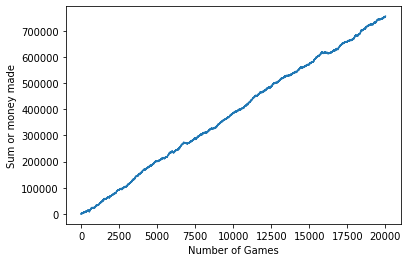

In [0]:
import matplotlib.pyplot as plt
import numpy as np
track = len(log[1])
wander = 0
y = np.zeros(track)
# wander keeps track of the agents net profit. y keeps track of the reward for each game
for i in range(0, track):
  wander += log[1][i]
  y[i] = wander
print(wander)

# This plot shows the net profit made over the number of games
x = np.linspace(0, track, track)
plt.plot()
plt.plot(x, y[0:track])
plt.xlabel("Number of Games")
plt.ylabel("Sum or money made")
plt.show()

[5.620000e+02 5.620000e+02 2.810000e+02 1.967000e+03 2.529000e+03
 4.215000e+03 8.711000e+03 1.236400e+04 2.026900e+04 2.949400e+04
 4.907700e+04 6.083900e+04 4.460185e+06 3.039800e+04 2.136300e+04
 1.236000e+04 6.134000e+03 3.955000e+03 3.503000e+03 3.390000e+02
 1.130000e+03 4.520000e+02 1.130000e+02 0.000000e+00 0.000000e+00
 2.260000e+02 1.130000e+02]
[2.0000e+00 2.0000e+00 1.0000e+00 7.0000e+00 9.0000e+00 1.5000e+01
 3.1000e+01 4.4000e+01 7.2000e+01 1.0300e+02 1.6000e+02 2.1100e+02
 1.8779e+04 1.7600e+02 1.4800e+02 9.9000e+01 5.4000e+01 3.5000e+01
 3.1000e+01 3.0000e+00 1.0000e+01 4.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 2.0000e+00 1.0000e+00]


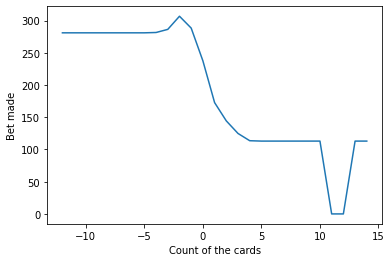

In [0]:
# max bet made by agent
max_count = max(log[2])
# min bet made
min_count = min(log[2])
plus_minus = max_count + abs(min_count) +1
num_count = np.zeros(plus_minus)
num_num_count = np.zeros(plus_minus)
# num_count is indexed by the count of the cards for each game. At each index you will find the sum total of all the bets made at that index
# num_num_count is indexed by the count of the cards for each game. At each index you will find the number of times a game was when the count was the index
for i in range(0, track):
  if log[2][i] == 11: print(log[0][i])
  num_count[log[2][i]+abs(min_count)] = num_count[log[2][i]+abs(min_count)] + abs(log[0][i])
  num_num_count[log[2][i]+abs(min_count)] = num_num_count[log[2][i]+abs(min_count)] + 1

avg_count = np.zeros(plus_minus)
# avg_count tracks the average bet made at each count.
for i in range(0, plus_minus):
  if num_num_count[i] != 0: avg_count[i] = num_count[i]/ num_num_count[i]
  else: avg_count[i] = 0

# This plot shows the average bet based on what the count of the cards was
h = np.linspace(min_count, max_count, plus_minus)
plt.plot(h, avg_count[0:plus_minus])
plt.xlabel("Count of the cards")
plt.ylabel("Bet made")

[230.74626866 209.49230769 207.95       209.97183099 203.75
 204.69642857 221.20634921 195.56896552 210.08974359 199.05797101
 216.84375    237.14035088 220.47457627 205.18571429 209.8125
 209.90740741 224.11428571 203.68333333 221.70833333 202.66176471
 218.87037037 240.10526316 240.87179487 282.91071429 253.01666667
 275.41791045 311.58461538 261.72307692 275.46875    252.07462687
 290.12121212 250.73770492 271.95522388 298.5625     288.
 253.3220339  260.85294118 273.79310345 286.93548387 250.98571429
 250.08064516 256.8        247.8030303  232.453125   258.6
 238.671875   228.06779661 279.64383562 228.86153846 278.515625
 209.39726027 280.73214286 251.78571429 244.06578947 246.27586207
 257.23287671 279.79365079 272.07352941 280.9122807  248.046875
 217.76470588 185.4516129  214.0483871  192.27118644 218.54929577
 214.26666667 209.46875    219.6        232.79245283 215.85074627
 177.70967742 226.28571429 218.57377049 197.88888889 204.79104478
 236.53623188 183.74285714 210.46875   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0, 0.5, 'Bet made')

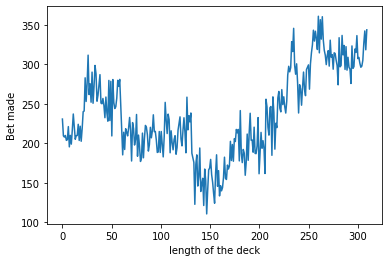

In [0]:
deck_length = np.zeros(52)
num_deck_length = np.zeros(52)
# deck_length tracks the total sum of bets made indexed by the length of the deck at that time.
# num_deck_length track the number of times a bet made at that index occured
for i in range(0, track):
  deck_length[log[3][i]] = deck_length[log[3][i]] + log[0][i]
  num_deck_length[log[3][i]] = num_deck_length[log[3][i]] + 1

# deck_avg tracks the avg bet made at the length of the deck
deck_avg = np.zeros(52)
for i in range(0, 52):
  deck_avg[i] = deck_length[i]/num_deck_length[i]

# Plots the bet made by the length of the deck
e = np.linspace(0, 52, 52)
plt.plot(e, deck_avg[0:52])
plt.xlabel("length of the deck")
plt.ylabel("Bet made")

In [0]:
# Tracks the average bet the agent makes
av_bet = 0
for i in range(0, track):
  av_bet += log[0][i]

print(av_bet/track)

236.55705


In [0]:
# Mr. Kyle King. 2020 March 6-7.Assistance given to the author, verbal discussion and electronic copying.
# https://gist.github.com/kylekyle/ba1d0d716b644e83495e95d68418167a Using this code and 
# verabl discussion Mr. King helped me understand how to use a reinforcement learning model
# and create an agent.

In [0]:
# Mr. Matthias Plappert. 2020 March 6. Electronic copying. https://github.com/keras-rl/keras-rl
# I used Keras-rl for this project and the example dqn_cartpole.py to understand how to import
# Keras featurs and compile my blackjack agent.

In [0]:
# Open AI gym contributers. 2020 March 6. Electronic copying. https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py
# I modyfied the code from blackjack.py as my agent. Most of the methods from blackjack.py remain unchanged from the source.